In [2]:
import pylhe
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak
import pandas as pd

M_Z = 91.187  # mass of Z boson (GeV)

In [3]:
sm = pd.read_csv("./data/SM_10k.csv")
o1 = pd.read_csv("./data/cHDD_1_10k.csv")
o2 = pd.read_csv("./data/cHDD_2_10k.csv")
# Apply cuts
sm = sm[
    (abs(sm["m_ll"] - M_Z) < 15) & (sm["m_jj"] > 300) & (abs(sm["delta_eta_jj"]) > 2.5)
]
o1 = o1[
    (abs(o1["m_ll"] - M_Z) < 15) & (o1["m_jj"] > 300) & (abs(o1["delta_eta_jj"]) > 2.5)
]
o2 = o2[
    (abs(o2["m_ll"] - M_Z) < 15) & (o2["m_jj"] > 300) & (abs(o2["delta_eta_jj"]) > 2.5)
]

selection = [
    "m_ll",
    "m_jj",
    "pt_l1",
    "pt_l2",
    "pt_j1",
    "pt_j2",
    "pt_ll",
    "eta_l1",
    "eta_l2",
    "eta_j1",
    "eta_j2",
    "delta_eta_jj",
    "delta_phi_jj",
]
sm_w = sm["cross_section_weight"]
o1_w = o1["cross_section_weight"]
o2_w = o2["cross_section_weight"]

sm = sm[selection]
o1 = o1[selection]
o2 = o2[selection]

(array([  7.25121117,   9.06401396,  11.96449843,  24.86129544,
        114.51734212, 111.87582948,  17.5582899 ,   6.94044498,
          4.5061098 ,   3.72919432]),
 array([ 76.1986208 ,  79.19367505,  82.1887293 ,  85.18378355,
         88.1788378 ,  91.17389205,  94.1689463 ,  97.16400055,
        100.15905481, 103.15410906, 106.14916331]),
 [<matplotlib.patches.Polygon at 0x7ff765a40800>])

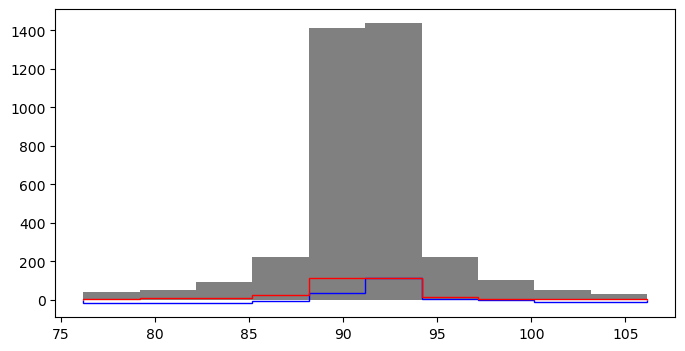

In [16]:
n_bins = 10
ci = 3
var = "m_ll"
r__ = [
    min(np.min(sm[var]), np.min(o1[var]), np.min(o2[var])),
    max(np.max(sm[var]), np.max(o1[var]), np.max(o2[var])),
]
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.hist(sm[var], weights=sm_w, bins=n_bins, color="gray", range=r__)
ax.hist(
    o1[var], weights=ci * o1_w, bins=n_bins, color="blue", histtype="step", range=r__
)
ax.hist(
    o2[var], weights=ci**2 * o2_w, bins=n_bins, color="red", histtype="step", range=r__
)

In [24]:
nbins = 200
var = "delta_phi_jj"
r__ = [
    min(np.min(sm[var]), np.min(o1[var]), np.min(o2[var])),
    max(np.max(sm[var]), np.max(o1[var]), np.max(o2[var])),
]
sm_h, _ = np.histogram(sm[var], nbins, weights=sm_w, range=r__)
lin_h, _ = np.histogram(o1[var], nbins, weights=o1_w, range=r__)
quad_h, _ = np.histogram(o2[var], nbins, weights=o2_w, range=r__)
c = np.linspace(-5, 2, 100)
chi = [sum((sm_h - (sm_h + (ci) * lin_h + (ci**2) * quad_h)) ** 2) for ci in c]

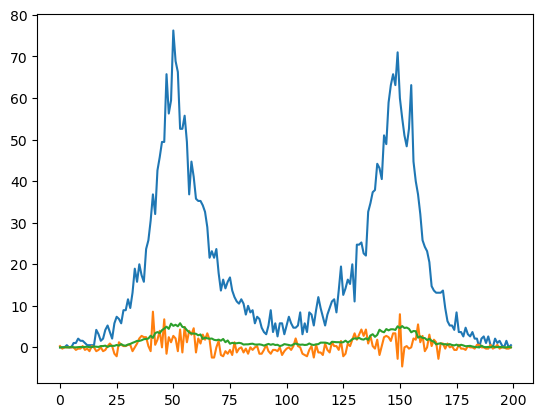

In [26]:
plt.plot(sm_h)
plt.plot(3 * lin_h)
plt.plot(9 * quad_h)

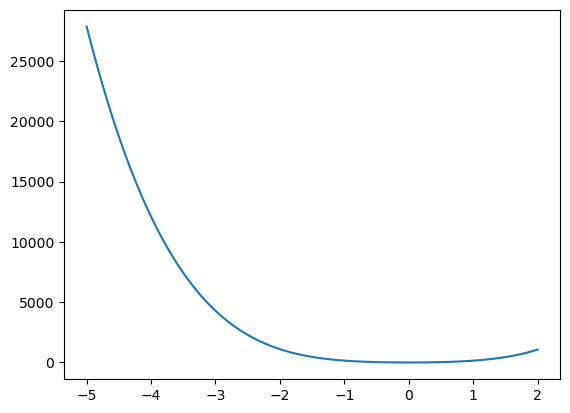

In [7]:
plt.plot(c, chi)

In [21]:
nbins = 200
chi = []
eps = 1e-2
c = np.linspace(-2, 2, 100)
selection = [
    "m_ll",
    "m_jj",
    "pt_l1",
    "pt_j1",
    "pt_ll",
    "eta_l1",
    "eta_j1",
    "delta_eta_jj",
    "delta_phi_jj",
]
for var in selection:
    r__ = [
        min(np.min(sm[var]), np.min(o1[var]), np.min(o2[var])),
        max(np.max(sm[var]), np.max(o1[var]), np.max(o2[var])),
    ]
    sm_h, _ = np.histogram(sm[var], nbins, weights=sm_w, range=r__)
    lin_h, _ = np.histogram(o1[var], nbins, weights=o1_w, range=r__)
    quad_h, _ = np.histogram(o2[var], nbins, weights=o2_w, range=r__)

    chi.append(
        [
            sum(
                (sm_h - (sm_h + (ci) * lin_h + (ci**2) * quad_h))[sm_h != 0] ** 2
                / sm_h[sm_h != 0]
            )
            for ci in c
        ]
    )

print(sm_h[sm_h != 0].shape)

(191,)


Text(0.5, 1.0, 'chi2 for Observables')

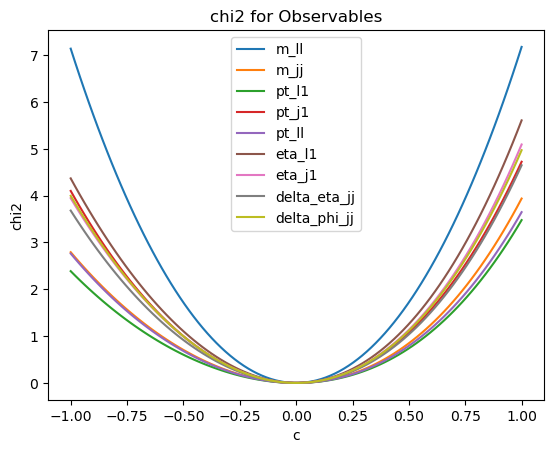

In [20]:
for i in range(len(selection)):
    plt.plot(c, chi[i], label=selection[i])

plt.legend()
plt.xlabel("c")
plt.ylabel("chi2")
plt.title("chi2 for Observables")